# 1. Problema de ordenamiento

**Entrada**: Secuencia de $n$ números $[a_1, a_2, ..., a_n]$, con $n \in \mathbb{N}$.

**Salida**: Permutación ordenada de la secuencia de entrada $[a_1', a_2', ..., a_n']$ tal que $a_1' \leq a_2' \leq ... \leq a_n'$

# 2 Descripción del Algoritmo

## 2.1. MergeSort

El arreglo original se divide en 2 subarreglos de largo similar. Se repite el proceso de subdivisión recursivamente hasta que queden arreglos de tamaño suficiente para que ordenarlos sea trivial. A continuación se hace uso de la función _merge_, que se encarga de ir juntanto los subarreglos de tal manera que los elementos queden ordenados. El proceso se repite hasta que el último _merge_ genera el arreglo original pero con sus elementos ordenados.

In [15]:
def mergeSort(arr, l, r, verbose=False):
    global c, recur
    recur += 1
    if l == r: return # Arreglo de 1 elemento
    if l < r:
        m = l+(r-l)//2
        mergeSort(arr, l, m, verbose)
        mergeSort(arr, m+1, r, verbose)
        merge(arr, l, m, r, verbose)
    return

In [16]:
def merge(arr, l, m, r, verbose=False):
    global c

    """Merges two subarrays of arr[].
    First subarray is arr[l..m]
    Second subarray is arr[m+1..r]"""

    #if verbose:
    #    print(arr[l:m+1])
    #    print(arr[m+1:r+1])

    n1 = m - l + 1
    n2 = r - m
 
    # create temp arrays
    Left = [0] * (n1) # Crea vector de ceros de largo m-l-1
    Right = [0] * (n2) # Crea vector de ceros de largo r-m

    # --------------------------------------------------------------------------
    # Bloque que genera 2 arreglos, Left y Right, con los elementos de arr[]
    # que corresponden
    for i in range(0, n1):
        Left[i] = arr[l + i]
 
    for j in range(0, n2):
        Right[j] = arr[m + 1 + j]

    if verbose:
        print("Lista izquierda:", Left)
        print("Lista derecha:", Right)
    
    #if verbose:
    #    print("Arreglo izquierdo:",Left)
    #    print("Arreglo derecho:",Right)
    # --------------------------------------------------------------------------
 
    # Resetea los índices
    i = 0     # Initial index of first subarray
    j = 0     # Initial index of second subarray
    k = l     # Initial index of merged subarray
 
    # --------------------------------------------------------------------------
    # Bloque que combina ambos arreglos de manera ordenada
    while i < n1 and j < n2:
        c += 1
        #if verbose:
        #    print(c)
        if Left[i] <= Right[j]:
            arr[k] = Left[i]
            i += 1
        else:
            arr[k] = Right[j]
            j += 1
        k += 1

    if verbose:
        print("Comparaciones acumuladas:",c)
 
    # Copy the remaining elements of Left[], if there are any
    while i < n1:
        arr[k] = Left[i]
        i += 1
        k += 1
 
    # Copy the remaining elements of Right[], if there are any
    while j < n2:
        arr[k] = Right[j]
        j += 1
        k += 1
    
    if verbose:
        print("Resultado merge:",arr, "\n")
    # --------------------------------------------------------------------------
    return


### 2.1.1. Ejemplo

Usando como ejemplo el arreglo

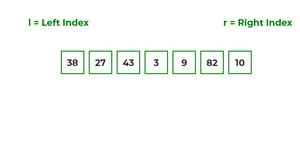

Primero se va subdividiendo en arreglos de menor tamaño:

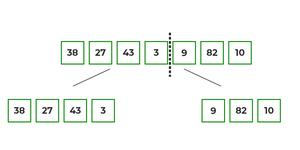


Se repite el proceso de subdivisión:

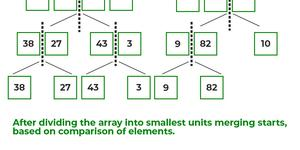

A continuación, cada llamada de la función _merge_ combinará los elementos en subarreglos ordenados:

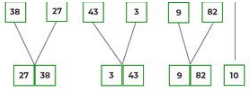

Y el proceso de _merge_ se repite hasta que se obtiene el arreglo original con sus elementos ordenados:

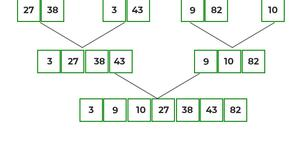

### 2.1.2. Ejecución del algoritmo paso a paso (`verbose=True`)

In [17]:
import random
arr = random.sample(range(1, 100), 6)
print("Entrada:", arr, "\n")
n = len(arr)
c, recur = 0, 0
mergeSort(arr, 0, n-1 , True)
print("Salida:", arr)
print("Comparaciones totales",c)
print("Llamadas recursivas",recur)

Entrada: [84, 85, 31, 95, 37, 11] 

Lista izquierda: [84]
Lista derecha: [85]
Comparaciones acumuladas: 1
Resultado merge: [84, 85, 31, 95, 37, 11] 

Lista izquierda: [84, 85]
Lista derecha: [31]
Comparaciones acumuladas: 2
Resultado merge: [31, 84, 85, 95, 37, 11] 

Lista izquierda: [95]
Lista derecha: [37]
Comparaciones acumuladas: 3
Resultado merge: [31, 84, 85, 37, 95, 11] 

Lista izquierda: [37, 95]
Lista derecha: [11]
Comparaciones acumuladas: 4
Resultado merge: [31, 84, 85, 11, 37, 95] 

Lista izquierda: [31, 84, 85]
Lista derecha: [11, 37, 95]
Comparaciones acumuladas: 9
Resultado merge: [11, 31, 37, 84, 85, 95] 

Salida: [11, 31, 37, 84, 85, 95]
Comparaciones totales 9
Llamadas recursivas 11


# 3. Correctitud

## 3.1. Teorema 1: _Merge_

Al principio de cada iteración el arreglo A[p,..., k-1] contiene los $(k-p)$ elementos más pequeños de L[1,..., $n_1$-1] y R[1,..., $n_2$-1] en orden ascendente. Además, L[i] y R[i] son los elementos más pequeños del arreglo que no han sido copiados a A.

**Inicialización**: con $k=p$ se tiene que A[p,..., k-1] está vacío, con $k-p=0$ elementos. $i=j=1$, entonces L[i] y R[i] contienen los elementos no copiados en A.

**Mantención**: considerando L[i] < R[i], L[i] es el menor elemento que no está en A, con A[p,..., k-1] conteniendo los $k-p$ menores elementos. Al agregar L[i], A[k] = L[i], por lo que A[p,..., k] contiene los $k-p+1$ menores elementos ordenados de menor a mayor. Así, queda probada la propiedad de bucle invariante de _Merge_.

## 3.2. Teorema 2: _MergeSort_

_El algoritmo MergeSort genera un arreglo $[a_1', a_2', ..., a_i']$ con los mismos elementos que el arreglo original, pero donde se cumple que $a_1' < a_2' < ... < a_i'$._

## 3.2.1. Demostración

En el **caso base** MergeSort entrega un arreglo de largo 1, trivialmente ordenado, con lo que se cumple P(1).

Para $i$ elementos, el algoritmo divide el arreglo en 2 subarreglos de tamaño $a = \lfloor\frac{i}{2}\rfloor$ y $a = \lceil\frac{i}{2}\rceil$ y los ordena usando _MergeSort_.

Los 2 subarreglos son combinados con la función _merge_ y según el Teorema, dicha función retorna un arreglo con los mismos elementos de los subarreglos pero ordenados. Así, se cumple el **Teorema de Correctitud**.

# 4. Análisis de tiempo de ejecución

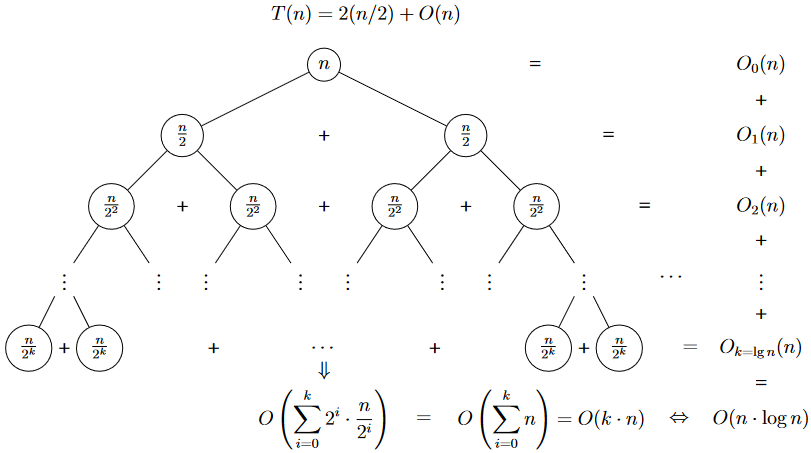

Con $T(n)= 2T(\frac{n}{2}) + O(n)$,

al dividir la lista en 2 partes, $2 \cdot T(\frac{n}{2})$ y aplicar la función _merge_, $c \cdot n$,

la siguiente división será $2 \cdot \left(2 \cdot T(\frac{n}{4}) + c \cdot \frac{n}{2}\right) + c \cdot n = 4 \cdot T(\frac{n}{4}) + 2 \cdot c \cdot n$

con lo que se puede deducir una generalidad:

$T(n) = 2^k \cdot T(\frac{n}{2^k}) + k \cdot c \cdot n$, con $k=\log n$

Así, $T(N) = N \cdot T(1) + N \cdot \log n \Rightarrow O(n \log n)$

# 5. Experimentos

## 5.1. Comparaciones vs peor caso vs mejor caso

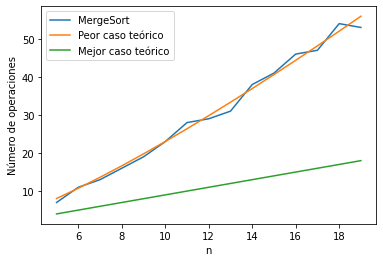

In [18]:
from math import log
import matplotlib.pyplot as plt

x = [n for n in range(5, 20)]
y1 = [n*log(n) for n in range(5, 20)]
y2 = [n-1 for n in range(5, 20)]
y = []

for n in range(5, 20):
  a = random.sample(range(1, 100), n)
  c, recur = 0, 0
  mergeSort(a, 0, len(a)-1, 0)
  y.append(c)

plt.plot(x, y)
plt.plot(x, y1) 
plt.plot(x, y2)
plt.legend(["MergeSort", "Peor caso teórico", "Mejor caso teórico"])

plt.xlabel("n")
plt.ylabel("Número de operaciones")
plt.show()

## 5.2. MergeSort vs InsertionSort

In [19]:
def insertionSort(arr, verbose=False):
    n = len(arr)
    c = 0 # Contador de comparaciones
    if verbose == True:
        print('\nInput array:', arr)
    # Se recorre el arreglo
    for i in range(1, n):
        c += 1
        if verbose == True:
            print('\nPasada', i)
        elemento = arr[i]
        j = i-1
        # Cambia la posición del elemento si es menor que su predecesor
        while j >= 0 and elemento < arr[j]:
            c += 1
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = elemento
        if verbose == True:
            print('\nArray:', arr)
    if verbose == True:
        print('\nDone')
    return arr, c

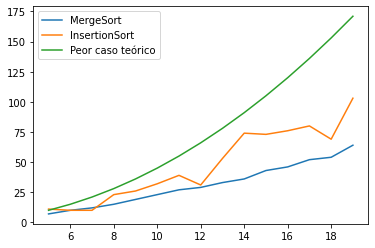

In [21]:
x = [n for n in range(5, 20)]
y = [n*(n-1)/2 for n in range(5, 20)]
y1 = []
y2 = []

for n in range(5, 20):
  a1 = random.sample(range(1, 100), n)
  a2 = random.sample(range(1, 100), n)
  c = 0
  mergeSort(a1, 0, len(a1)-1, 0)
  _, c2 = insertionSort(a2)
  y1.append(c)
  y2.append(c2)

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y)

plt.legend(["MergeSort", "InsertionSort", "Peor caso teórico"])
plt.show()

Como se puede apreciar en el gráfico, _InsertionSort_ realiza consistentemente más comparaciones que _MergeSort_.